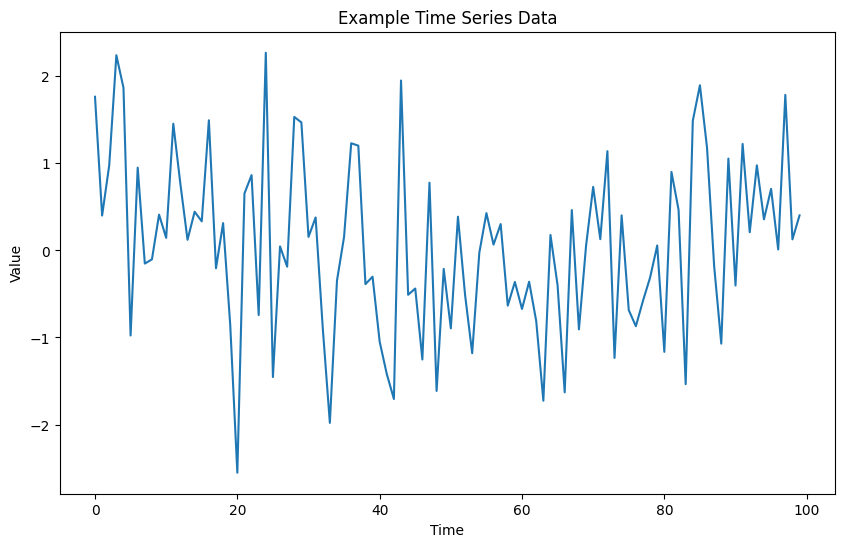

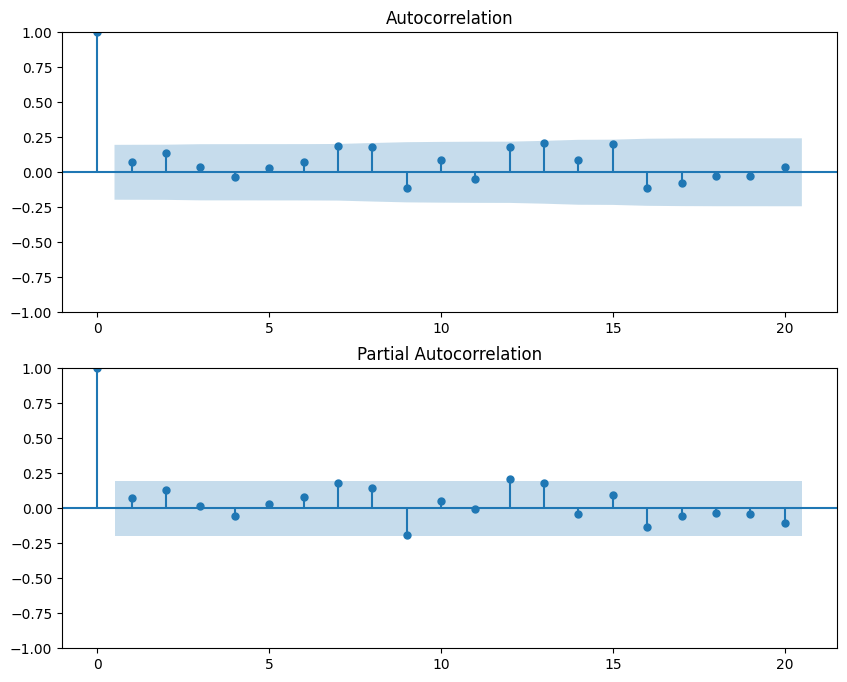

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -142.417
Date:                Wed, 08 May 2024   AIC                            290.835
Time:                        10:05:18   BIC                            298.651
Sample:                             0   HQIC                           293.998
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0614      0.108      0.566      0.571      -0.151       0.274
ar.L1          0.0730      0.095      0.767      0.443      -0.113       0.259
sigma2         1.0105      0.163      6.214      0.0

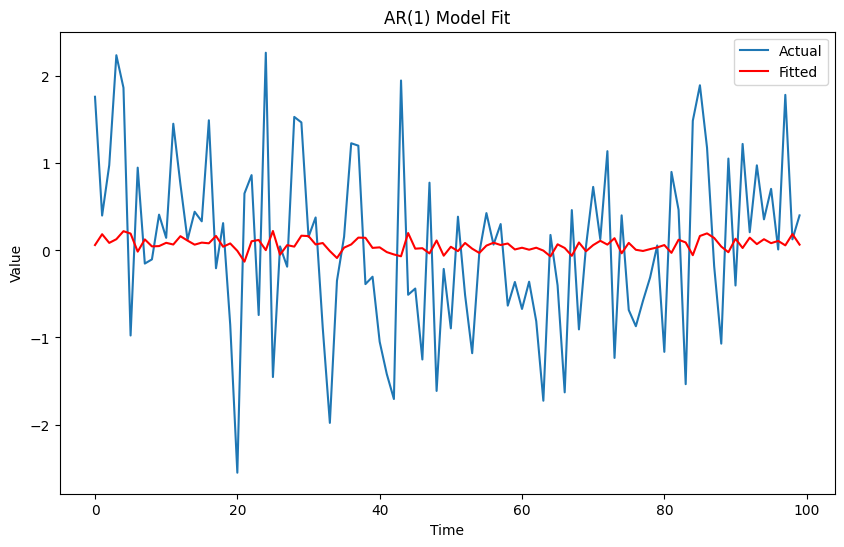

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(0)
time_series_data = np.random.randn(100)

plt.figure(figsize=(10, 6))
plt.plot(time_series_data)
plt.title('Example Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(time_series_data, ax=ax1, lags=20)
plot_pacf(time_series_data, ax=ax2, lags=20)
plt.show()

ar_model = ARIMA(time_series_data, order=(1, 0, 0))
ar_results = ar_model.fit()

print(ar_results.summary())

plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label='Actual')
plt.plot(ar_results.fittedvalues, color='red', label='Fitted')
plt.title('AR(1) Model Fit')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

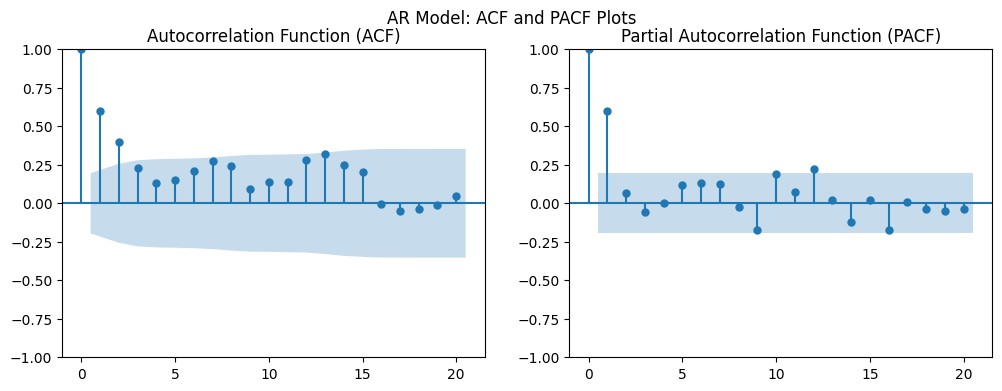

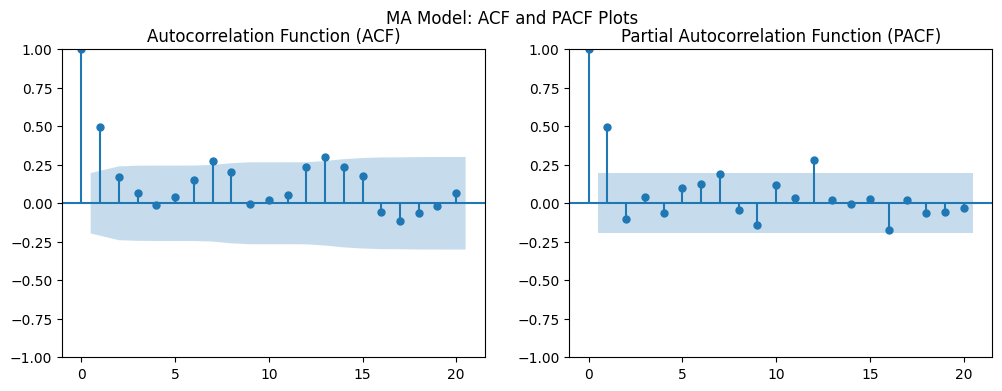

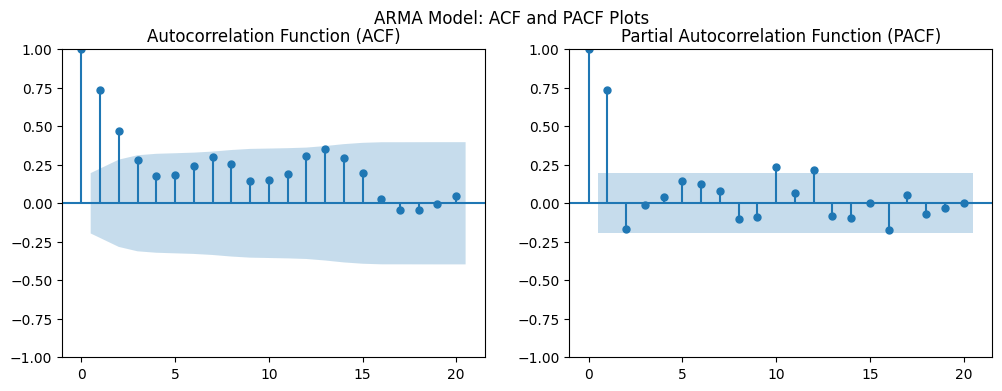

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

def generate_data(model_type, params, n):
    np.random.seed(0)
    if model_type == 'ar':
        y = sm.tsa.arma_generate_sample(ar=[1, -params[0]], ma=[1], nsample=n)
    elif model_type == 'ma':
        y = sm.tsa.arma_generate_sample(ar=[1], ma=[1, params[0]], nsample=n)
    elif model_type == 'arma':
        y = sm.tsa.arma_generate_sample(ar=[1, -params[0]], ma=[1, params[1]], nsample=n)
    return y

def plot_acf_pacf(data, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    sm.graphics.tsa.plot_acf(data, lags=20, ax=ax1)
    sm.graphics.tsa.plot_pacf(data, lags=20, ax=ax2)
    ax1.set_title('Autocorrelation Function (ACF)')
    ax2.set_title('Partial Autocorrelation Function (PACF)')
    plt.suptitle(title)
    plt.show()

def fit_model(data, model_type, lags):
    if model_type == 'ar':
        model = sm.tsa.AutoReg(data, lags=lags).fit()
    elif model_type == 'arima':
        model = sm.tsa.ARIMA(data, order=(1, 0, 1), seasonal_order=(0, 0, 0, 0)).fit()

n = 100

ar_params = np.array([0.5])
y_ar = generate_data('ar', ar_params, n)
plot_acf_pacf(y_ar, "AR Model: ACF and PACF Plots")
for lags in [1, 2]:
    fit_model(y_ar, 'ar', lags)

ma_params = np.array([0.5])
y_ma = generate_data('ma', ma_params, n)
plot_acf_pacf(y_ma, "MA Model: ACF and PACF Plots")
for lags in [0, 1]:
    fit_model(y_ma, 'ar', lags)

arma_params = np.array([0.5, 0.3])
y_arma = generate_data('arma', arma_params, n)
plot_acf_pacf(y_arma, "ARMA Model: ACF and PACF Plots")
for lags in [1, 2]:
    fit_model(y_arma, 'ar', lags)